# Jaccard similarity score between binary masks- ground truth and segmentation

This notebook illustrates the calculation of the Jaccard index (sklearn implementation) between 2 binary masks for 3 classes of the 2006 QuickBird image of Klayan, India.

## Load the truth and segmentation masks from disk

Python package imports:

In [9]:
# import
import os
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
from scipy.misc import imread
from sklearn.metrics import jaccard_similarity_score as jss

Paths and filenames:

In [10]:
# data paths
TRUTH_MASKS_PATH = '/home/elena/DynaSlum/Data/Kalyan/Rasterized_Lourens/'
RESULTS_MASKS_PATH = '/home/elena/DynaSlum/Results/Segmentation/'

# masks filenames
ext = 'tif'
slum_mask_fname = 'slums_mask' + '.' + ext
truth_slum_mask_fname = 'all_slums' + '.' + ext
builtup_mask_fname = 'builtup_mask' + '.' + ext
nonbuiltup_mask_fname = 'nonbuiltup_mask' + '.' + ext

# masks full filenames
truth_slum_mask_fullfname = os.path.join(TRUTH_MASKS_PATH, truth_slum_mask_fname)
truth_builtup_mask_fullfname = os.path.join(TRUTH_MASKS_PATH, builtup_mask_fname)
truth_nonbuiltup_mask_fullfname = os.path.join(TRUTH_MASKS_PATH, nonbuiltup_mask_fname)

result_slum_mask_fullfname = os.path.join(RESULTS_MASKS_PATH, slum_mask_fname)
result_builtup_mask_fullfname = os.path.join(RESULTS_MASKS_PATH, builtup_mask_fname)
result_nonbuiltup_mask_fullfname = os.path.join(RESULTS_MASKS_PATH, nonbuiltup_mask_fname)


Load the masks onto variables:

In [11]:
truth_slum_mask = imread(truth_slum_mask_fullfname)
result_slum_mask = imread(result_slum_mask_fullfname)

truth_builtup_mask = imread(truth_builtup_mask_fullfname)
result_builtup_mask = imread(result_builtup_mask_fullfname)

truth_nonbuiltup_mask = imread(truth_nonbuiltup_mask_fullfname)
result_nonbuiltup_mask = imread(result_nonbuiltup_mask_fullfname)


Print slum masks sizes and visualize them:

Truth slum mask shape:  (6223, 4872)
Result slum mask shape:  (6223, 4872)


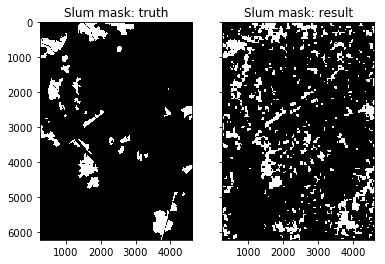

In [12]:
print("Truth slum mask shape: ", truth_slum_mask.shape)
print("Result slum mask shape: ", result_slum_mask.shape)
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.imshow(truth_slum_mask,cmap='gray')
ax1.set_title('Slum mask: truth')
ax2.imshow(result_slum_mask,cmap='gray')
ax2.set_title('Slum mask: result')

Print builtup masks sizes and visualize them:

Truth builtup mask shape:  (6223, 4872)
Result builtup mask shape:  (6223, 4872)


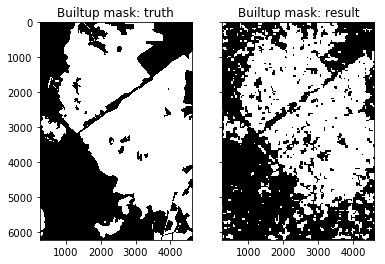

In [13]:
print("Truth builtup mask shape: ", truth_builtup_mask.shape)
print("Result builtup mask shape: ", result_builtup_mask.shape)

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.imshow(truth_builtup_mask,cmap='gray')
ax1.set_title('Builtup mask: truth')
ax2.imshow(result_builtup_mask,cmap='gray')
ax2.set_title('Builtup mask: result')

Print nonbuiltup masks sizes and visualize them:

Truth nonbuiltup mask shape:  (6223, 4872)
Result nonbuiltup mask shape:  (6223, 4872)


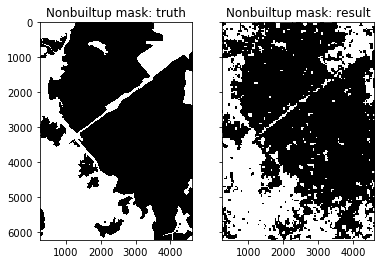

In [14]:
print("Truth nonbuiltup mask shape: ", truth_nonbuiltup_mask.shape)
print("Result nonbuiltup mask shape: ", result_nonbuiltup_mask.shape)

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.imshow(truth_nonbuiltup_mask,cmap='gray')
ax1.set_title('Nonbuiltup mask: truth')
ax2.imshow(result_nonbuiltup_mask,cmap='gray')
ax2.set_title('Nonbuiltup mask: result')

## Jaccard Similarity Score (JSS) computation

JSS between truth and result slum masks:

In [15]:
jss(truth_slum_mask, result_slum_mask)

0.27547755268903273

JSS between truth and result buildup masks:

In [16]:
jss(truth_builtup_mask, result_builtup_mask)

0.68232154564836522

JSS between truth and result nonbuildup masks:

In [17]:
jss(truth_nonbuiltup_mask, result_nonbuiltup_mask)

0.70546410353933864

Some sanity checks below, to be removed for export and final version!

In [18]:
truth_slum_mask[2100:2120, 500:520]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255, 2

In [19]:
jss(np.array([[0, 1], [1, 1]])*255, np.ones((2, 2))*255)

0.75

In [20]:
jss(np.array([[0, 1], [1, 1]]), np.ones((2, 2)))

0.75